## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load datasets
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
sample_submission = pd.read_csv('dataset/sample_submission.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nFirst few rows:")
train_df.head()

Training data shape: (1913, 14)
Test data shape: (479, 13)

First few rows:


,participant_id,age_group,identity_code,cultural_background,upbringing_influence,focus_intensity,consistency_score,external_guidance_usage,support_environment_score,hobby_engagement_level,physical_activity_index,creative_expression_index,altruism_score,personality_cluster
0,643,18,1,0,4,18.118879,24,1,0,1,1,0,0,Cluster_E
1,1753,16,1,3,2,2.469271,19,0,1,0,0,0,1,Cluster_E
2,1402,17,0,2,3,3.456401,25,0,0,0,0,0,0,Cluster_E
3,2033,17,1,0,1,15.838131,25,1,2,0,0,0,0,Cluster_E
4,991,16,0,0,0,1.045373,19,1,2,0,0,1,0,Cluster_E


## 3. Exploratory Data Analysis

In [3]:
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

Missing values in training data:
participant_id               0
age_group                    0
identity_code                0
cultural_background          0
upbringing_influence         0
focus_intensity              0
consistency_score            0
external_guidance_usage      0
support_environment_score    0
hobby_engagement_level       0
physical_activity_index      0
creative_expression_index    0
altruism_score               0
personality_cluster          0
dtype: int64

Missing values in test data:
participant_id               0
age_group                    0
identity_code                0
cultural_background          0
upbringing_influence         0
focus_intensity              0
consistency_score            0
external_guidance_usage      0
support_environment_score    0
hobby_engagement_level       0
physical_activity_index      0
creative_expression_index    0
altruism_score               0
dtype: int64


Target Distribution:
personality_cluster
Cluster_A     85
Cluster_B    220
Cluster_C    306
Cluster_D    328
Cluster_E    974
Name: count, dtype: int64

Percentages:
personality_cluster
Cluster_A     4.44
Cluster_B    11.50
Cluster_C    16.00
Cluster_D    17.15
Cluster_E    50.91
Name: count, dtype: float64


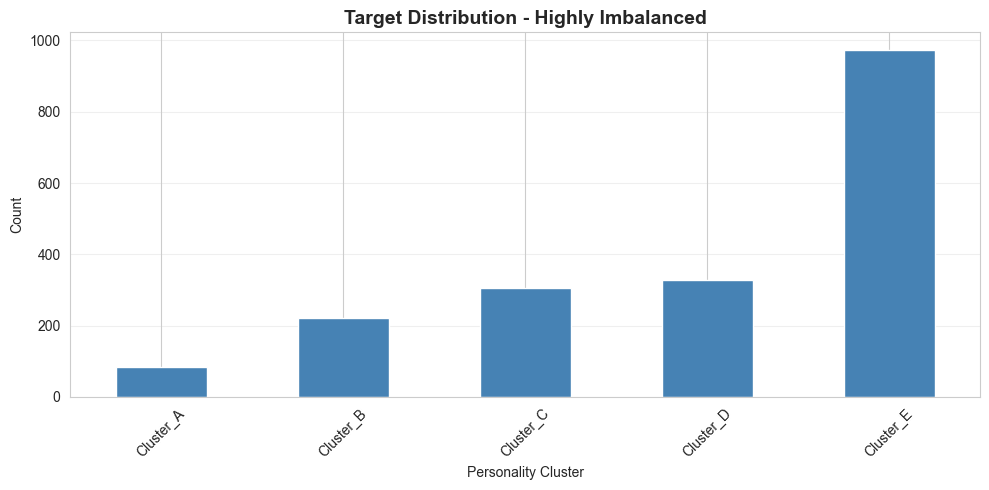

In [4]:
# Target distribution (Class Imbalance Check)
target_counts = train_df['personality_cluster'].value_counts().sort_index()
print("Target Distribution:")
print(target_counts)
print(f"\nPercentages:")
print((target_counts / len(train_df) * 100).round(2))

# Visualize
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', color='steelblue')
plt.title('Target Distribution - Highly Imbalanced', fontsize=14, fontweight='bold')
plt.xlabel('Personality Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Feature statistics
print("Numerical features statistics:")
train_df.describe()

Numerical features statistics:


,participant_id,age_group,identity_code,cultural_background,upbringing_influence,focus_intensity,consistency_score,external_guidance_usage,support_environment_score,hobby_engagement_level,physical_activity_index,creative_expression_index,altruism_score
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,1195.642446,16.456351,0.514375,0.872974,1.764245,9.748506,14.618400,0.302143,2.140617,0.380031,0.304757,0.198118,0.156299
std,687.474019,1.124705,0.499924,1.031951,0.988605,5.702764,8.485326,0.459307,1.118309,0.485521,0.460425,0.398686,0.363234
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.008031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,613.000000,15.000000,0.000000,0.000000,1.000000,4.958649,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1189.000000,16.000000,1.000000,0.000000,2.000000,9.518844,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1787.000000,17.000000,1.000000,2.000000,2.000000,14.407464,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,2392.000000,18.000000,1.000000,3.000000,4.000000,19.968425,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


## 4. Feature Engineering
Create meaningful interaction and aggregate features

In [6]:
def engineer_features(df):
    """
    Create new features from existing ones
    """
    df = df.copy()
    
    # 1. Total Engagement Score (sum of all activity indicators)
    df['total_engagement'] = (df['hobby_engagement_level'] + 
                              df['physical_activity_index'] + 
                              df['creative_expression_index'] + 
                              df['altruism_score'])
    
    # 2. Structured Living Score (discipline indicator)
    df['structured_living'] = df['consistency_score'] * df['focus_intensity']
    
    # 3. Social Support Index
    df['social_support'] = df['support_environment_score'] * (df['external_guidance_usage'] + 1)
    
    # 4. Age-Focus Interaction
    df['age_focus_interaction'] = df['age_group'] * df['focus_intensity']
    
    # 5. Binary: High Focus (above median)
    focus_median = df['focus_intensity'].median()
    df['high_focus'] = (df['focus_intensity'] > focus_median).astype(int)
    
    # 6. Binary: High Consistency (above 75th percentile)
    consistency_75 = df['consistency_score'].quantile(0.75)
    df['high_consistency'] = (df['consistency_score'] > consistency_75).astype(int)
    
    # 7. Is Active (any physical/hobby/creative activity)
    df['is_active'] = ((df['hobby_engagement_level'] + 
                        df['physical_activity_index'] + 
                        df['creative_expression_index']) > 0).astype(int)
    
    return df

# Apply feature engineering
train_df = engineer_features(train_df)
test_df = engineer_features(test_df)

print("New features created:")
new_features = ['total_engagement', 'structured_living', 'social_support', 
                'age_focus_interaction', 'high_focus', 'high_consistency', 'is_active']
print(new_features)
print(f"\nTraining data shape after feature engineering: {train_df.shape}")

New features created:
['total_engagement', 'structured_living', 'social_support', 'age_focus_interaction', 'high_focus', 'high_consistency', 'is_active']

Training data shape after feature engineering: (1913, 21)


## 5. Drop Irrelevant Columns

In [7]:
# Drop participant_id (not predictive)
train_ids = train_df['participant_id'].copy()
test_ids = test_df['participant_id'].copy()

train_df = train_df.drop('participant_id', axis=1)
test_df = test_df.drop('participant_id', axis=1)

print(f"Dropped participant_id column")
print(f"Training shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Dropped participant_id column
Training shape: (1913, 20)
Test shape: (479, 19)


## 6. Encode Target Variable

In [8]:
# Separate features and target
X = train_df.drop('personality_cluster', axis=1)
y = train_df['personality_cluster']
X_test = test_df.copy()

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Target encoding mapping:")
for i, cluster in enumerate(label_encoder.classes_):
    print(f"{cluster} -> {i}")

print(f"\nEncoded target shape: {y_encoded.shape}")

Target encoding mapping:
Cluster_A -> 0
Cluster_B -> 1
Cluster_C -> 2
Cluster_D -> 3
Cluster_E -> 4

Encoded target shape: (1913,)


## 7. One-Hot Encoding for Categorical Features
Required for Logistic Regression and SVMs

In [9]:
# Define categorical features to one-hot encode
categorical_features = ['cultural_background', 'upbringing_influence']

# Create copies for different algorithms
X_for_lr_svm = X.copy()
X_test_for_lr_svm = X_test.copy()

# One-hot encode
X_for_lr_svm = pd.get_dummies(X_for_lr_svm, columns=categorical_features, drop_first=False)
X_test_for_lr_svm = pd.get_dummies(X_test_for_lr_svm, columns=categorical_features, drop_first=False)

# Ensure same columns in train and test
missing_cols = set(X_for_lr_svm.columns) - set(X_test_for_lr_svm.columns)
for col in missing_cols:
    X_test_for_lr_svm[col] = 0
X_test_for_lr_svm = X_test_for_lr_svm[X_for_lr_svm.columns]

print(f"After one-hot encoding (for LR/SVM):")
print(f"Training shape: {X_for_lr_svm.shape}")
print(f"Test shape: {X_test_for_lr_svm.shape}")
print(f"\nColumns: {list(X_for_lr_svm.columns)}")

After one-hot encoding (for LR/SVM):
Training shape: (1913, 26)
Test shape: (479, 26)

Columns: ['age_group', 'identity_code', 'focus_intensity', 'consistency_score', 'external_guidance_usage', 'support_environment_score', 'hobby_engagement_level', 'physical_activity_index', 'creative_expression_index', 'altruism_score', 'total_engagement', 'structured_living', 'social_support', 'age_focus_interaction', 'high_focus', 'high_consistency', 'is_active', 'cultural_background_0', 'cultural_background_1', 'cultural_background_2', 'cultural_background_3', 'upbringing_influence_0', 'upbringing_influence_1', 'upbringing_influence_2', 'upbringing_influence_3', 'upbringing_influence_4']


## 8. Feature Scaling
Critical for all three algorithms

In [10]:
# Initialize scalers
scaler_lr_svm = StandardScaler()
scaler_nn = StandardScaler()

# Scale for Logistic Regression and SVM (one-hot encoded data)
X_scaled_lr_svm = scaler_lr_svm.fit_transform(X_for_lr_svm)
X_test_scaled_lr_svm = scaler_lr_svm.transform(X_test_for_lr_svm)

# Convert back to DataFrame for easier handling
X_scaled_lr_svm = pd.DataFrame(X_scaled_lr_svm, columns=X_for_lr_svm.columns)
X_test_scaled_lr_svm = pd.DataFrame(X_test_scaled_lr_svm, columns=X_test_for_lr_svm.columns)

# Scale for Neural Networks (original data without one-hot encoding)
X_scaled_nn = scaler_nn.fit_transform(X)
X_test_scaled_nn = scaler_nn.transform(X_test)

X_scaled_nn = pd.DataFrame(X_scaled_nn, columns=X.columns)
X_test_scaled_nn = pd.DataFrame(X_test_scaled_nn, columns=X_test.columns)

print("Feature scaling completed!")
print(f"\nScaled data for LR/SVM shape: {X_scaled_lr_svm.shape}")
print(f"Scaled data for NN shape: {X_scaled_nn.shape}")

Feature scaling completed!

Scaled data for LR/SVM shape: (1913, 26)
Scaled data for NN shape: (1913, 19)


## 9. Train-Validation Split
Stratified split to maintain class distribution

In [11]:
# Split for LR/SVM
X_train_lr_svm, X_val_lr_svm, y_train, y_val = train_test_split(
    X_scaled_lr_svm, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

# Split for NN (same split using indices)
X_train_nn, X_val_nn, _, _ = train_test_split(
    X_scaled_nn, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"Training set size: {len(X_train_lr_svm)}")
print(f"Validation set size: {len(X_val_lr_svm)}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())

Training set size: 1530
Validation set size: 383

Class distribution in training set:
0     68
1    176
2    245
3    262
4    779
Name: count, dtype: int64


## 10. Handle Class Imbalance with SMOTE
Optional: Apply SMOTE to balance classes

After SMOTE:
Training set size: 3895

Balanced class distribution:
0    779
1    779
2    779
3    779
4    779
Name: count, dtype: int64


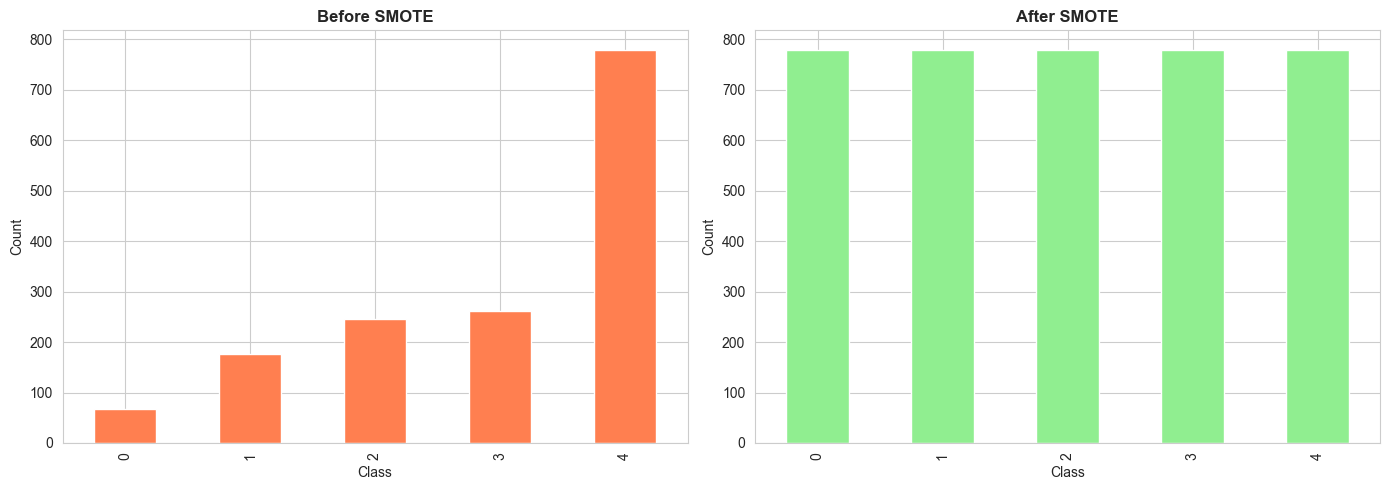

In [12]:
# Apply SMOTE only to training data
smote = SMOTE(random_state=42, k_neighbors=3)

# For LR/SVM
X_train_lr_svm_smote, y_train_smote = smote.fit_resample(X_train_lr_svm, y_train)

# For NN
X_train_nn_smote, _ = smote.fit_resample(X_train_nn, y_train)

print("After SMOTE:")
print(f"Training set size: {len(X_train_lr_svm_smote)}")
print(f"\nBalanced class distribution:")
print(pd.Series(y_train_smote).value_counts().sort_index())

# Visualize before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pd.Series(y_train).value_counts().sort_index().plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Before SMOTE', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

pd.Series(y_train_smote).value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('After SMOTE', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 11. Save Preprocessed Data

In [13]:
import pickle

# Create a dictionary with all preprocessed datasets
preprocessed_data = {
    # For Logistic Regression and SVM
    'X_train_lr_svm': X_train_lr_svm,
    'X_val_lr_svm': X_val_lr_svm,
    'X_test_lr_svm': X_test_scaled_lr_svm,
    'X_train_lr_svm_smote': X_train_lr_svm_smote,
    
    # For Neural Networks
    'X_train_nn': X_train_nn,
    'X_val_nn': X_val_nn,
    'X_test_nn': X_test_scaled_nn,
    'X_train_nn_smote': X_train_nn_smote,
    
    # Target variables
    'y_train': y_train,
    'y_val': y_val,
    'y_train_smote': y_train_smote,
    
    # Encoders and scalers
    'label_encoder': label_encoder,
    'scaler_lr_svm': scaler_lr_svm,
    'scaler_nn': scaler_nn,
    
    # IDs for submission
    'test_ids': test_ids
}

# Save to pickle file
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessed_data, f)

print("✓ Preprocessed data saved to 'preprocessed_data.pkl'")
print("\nDatasets available:")
print("- Logistic Regression / SVM: X_train_lr_svm, X_val_lr_svm, X_test_lr_svm")
print("- Neural Networks: X_train_nn, X_val_nn, X_test_nn")
print("- SMOTE versions: X_train_lr_svm_smote, X_train_nn_smote")
print("- Target: y_train, y_val, y_train_smote")

✓ Preprocessed data saved to 'preprocessed_data.pkl'

Datasets available:
- Logistic Regression / SVM: X_train_lr_svm, X_val_lr_svm, X_test_lr_svm
- Neural Networks: X_train_nn, X_val_nn, X_test_nn
- SMOTE versions: X_train_lr_svm_smote, X_train_nn_smote
- Target: y_train, y_val, y_train_smote


## Alternative: Save as CSV Files
Export preprocessed datasets as separate CSV files for easier sharing and inspection

In [15]:
import os

# Create directory for CSV exports
os.makedirs('preprocessed_csv', exist_ok=True)

# Save training data for LR/SVM
X_train_lr_svm.to_csv('preprocessed_csv/X_train_lr_svm.csv', index=False)
X_val_lr_svm.to_csv('preprocessed_csv/X_val_lr_svm.csv', index=False)
X_test_scaled_lr_svm.to_csv('preprocessed_csv/X_test_lr_svm.csv', index=False)
X_train_lr_svm_smote.to_csv('preprocessed_csv/X_train_lr_svm_smote.csv', index=False)

# Save training data for Neural Networks
X_train_nn.to_csv('preprocessed_csv/X_train_nn.csv', index=False)
X_val_nn.to_csv('preprocessed_csv/X_val_nn.csv', index=False)
X_test_scaled_nn.to_csv('preprocessed_csv/X_test_nn.csv', index=False)
X_train_nn_smote.to_csv('preprocessed_csv/X_train_nn_smote.csv', index=False)

# Save target variables
pd.DataFrame({'y_train': y_train}).to_csv('preprocessed_csv/y_train.csv', index=False)
pd.DataFrame({'y_val': y_val}).to_csv('preprocessed_csv/y_val.csv', index=False)
pd.DataFrame({'y_train_smote': y_train_smote}).to_csv('preprocessed_csv/y_train_smote.csv', index=False)

# Save test IDs for submission
pd.DataFrame({'participant_id': test_ids}).to_csv('preprocessed_csv/test_ids.csv', index=False)

# Save label encoder mapping
label_mapping = pd.DataFrame({
    'cluster_name': label_encoder.classes_,
    'encoded_value': range(len(label_encoder.classes_))
})
label_mapping.to_csv('preprocessed_csv/label_encoder_mapping.csv', index=False)

print("✓ CSV files saved to 'preprocessed_csv/' directory")
print("\nFiles created:")
print("  For Logistic Regression/SVM:")
print("    - X_train_lr_svm.csv")
print("    - X_val_lr_svm.csv")
print("    - X_test_lr_svm.csv")
print("    - X_train_lr_svm_smote.csv")
print("\n  For Neural Networks:")
print("    - X_train_nn.csv")
print("    - X_val_nn.csv")
print("    - X_test_nn.csv")
print("    - X_train_nn_smote.csv")
print("\n  Target variables:")
print("    - y_train.csv")
print("    - y_val.csv")
print("    - y_train_smote.csv")
print("\n  Additional:")
print("    - test_ids.csv")
print("    - label_encoder_mapping.csv")
print("\nNote: Scalers cannot be saved as CSV. Use pickle file for complete reproducibility.")

✓ CSV files saved to 'preprocessed_csv/' directory

Files created:
  For Logistic Regression/SVM:
    - X_train_lr_svm.csv
    - X_val_lr_svm.csv
    - X_test_lr_svm.csv
    - X_train_lr_svm_smote.csv

  For Neural Networks:
    - X_train_nn.csv
    - X_val_nn.csv
    - X_test_nn.csv
    - X_train_nn_smote.csv

  Target variables:
    - y_train.csv
    - y_val.csv
    - y_train_smote.csv

  Additional:
    - test_ids.csv
    - label_encoder_mapping.csv

Note: Scalers cannot be saved as CSV. Use pickle file for complete reproducibility.


## 12. Summary Statistics

In [14]:
print("="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"\n✓ Original training samples: {len(train_df)}")
print(f"✓ Test samples: {len(test_df)}")
print(f"\n✓ Features after engineering: {X.shape[1]}")
print(f"✓ Features after one-hot encoding (LR/SVM): {X_for_lr_svm.shape[1]}")
print(f"\n✓ Training set (80%): {len(X_train_lr_svm)}")
print(f"✓ Validation set (20%): {len(X_val_lr_svm)}")
print(f"\n✓ Training set after SMOTE: {len(X_train_lr_svm_smote)}")
print(f"\n✓ Target classes: {len(label_encoder.classes_)}")
print(f"✓ Class names: {list(label_encoder.classes_)}")
print("\n" + "="*60)
print("Ready for model training!")
print("="*60)

PREPROCESSING SUMMARY

✓ Original training samples: 1913
✓ Test samples: 479

✓ Features after engineering: 19
✓ Features after one-hot encoding (LR/SVM): 26

✓ Training set (80%): 1530
✓ Validation set (20%): 383

✓ Training set after SMOTE: 3895

✓ Target classes: 5
✓ Class names: ['Cluster_A', 'Cluster_B', 'Cluster_C', 'Cluster_D', 'Cluster_E']

Ready for model training!
